# Example of ``spinWannier`` package usage

In [1]:
from spinWannier.WannierTBmodel import WannierTBmodel

## 1. Define the directories

In [2]:
model_folder='CrSTe_minimal'

sc_dir=f'{model_folder}/0_self-consistent'
nsc_dir=f'{model_folder}/1_non-self-consistent'
wann_dir=f'{model_folder}/2_wannier'
bands_dir=f'{model_folder}/1_band_structure'
tb_model_dir=f'{model_folder}/2_wannier/tb_model_wann90'

spn_file_extension = 'spn'
spn_formatted = False

data_saving_format = 'npz' #'pickle' #'parquet'


# Create a WannierTBmodel object, load the model
model = WannierTBmodel(sc_dir=sc_dir, nsc_dir=nsc_dir, wann_dir=wann_dir, bands_dir=bands_dir, tb_model_dir=tb_model_dir, \
                       data_saving_format=data_saving_format, \
                       spn_file_extension=spn_file_extension, spn_formatted=spn_formatted)

Wannier model constructed!


## 2. Interpolate and plot 1D spin-colored band structure

In [3]:
kpoint_matrix = [
                [(0.333333,  0.333333,  0.000000),    (0.00,  0.00,  0.00)],
                [(0.00,  0.00,  0.00),    (0.50, 0.00,  0.00)],
                [(0.50, 0.00,  0.00),    (0.333333,  0.333333,  0.000000)]
                ]

In [4]:
kpath_ticks = ['K', 'G', 'M', 'K']
Nk = 37
fout_1D = f'bands_spin_{Nk}'
savefig = True
showfig = True

model.interpolate_bands_and_spin(kpoint_matrix, kpath_ticks=kpath_ticks, kmesh_2D=False, kmesh_density=Nk, \
                                 kmesh_2D_limits=[-0.5, 0.5], save_bands_spin_texture=True, fout=fout_1D)

model.plot1D_bands(fout='spin_texture_1D_home_made.jpg', yaxis_lim=[-6.6, 7.5], savefig=savefig, showfig=showfig)



kpoints and preparation: 0.004
get operator in Wannier gauge: 0.027
Fourier transform to real space: 0.160
save real-space representation: 0.013
   O_mn_R_W_matrices shape (625, 22, 22)
IF: conversion of data types 0.002s
IF: dot product kpoints and R_vectors 0.000s
   exp_term shape (114, 625)
IF: exponent array 0.005s
IF: sum of exponent-multiplied matrices 0.002s
IF: comprehension - building dictionary 0.000s
inverse Fourier (real to W gauge): 0.010
W gauge to H gauge: 0.039

kpoints and preparation: 0.005
get operator in Wannier gauge: 0.018
Fourier transform to real space: 1.392
save real-space representation: 0.013
   O_mn_R_W_matrices shape (625, 22, 22)
IF: conversion of data types 0.003s
IF: dot product kpoints and R_vectors 0.000s
   exp_term shape (114, 625)
IF: exponent array 0.005s
IF: sum of exponent-multiplied matrices 0.002s
IF: comprehension - building dictionary 0.000s
inverse Fourier (real to W gauge): 0.011
W gauge to H gauge: 0.002

kpoints and preparation: 0.004


ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

## 3. Interpolate and plot 2D spin textures

In [ ]:
Nk2D = 208
data_2D_fname = f'bands_spin_2D_{Nk2D}x{Nk2D}'
savefig = True
showfig = True
E_window = 0.050 # eV
n_points_for_one_angstrom_radius = 120

model.interpolate_bands_and_spin(kpoint_matrix, kmesh_2D=True, kmesh_density=Nk2D, kmesh_2D_limits=[-0.5, 0.5], \
                                   save_bands_spin_texture=True, fout=data_2D_fname, )

model.plot2D_spin_texture(fin_2D=data_2D_fname, fin_1D=fout_1D, fig_name="spin_texture_2D_home_made.jpg", savefig=savefig, showfig=showfig, E_window=E_window, n_points_for_one_angstrom_radius=n_points_for_one_angstrom_radius)


kpoints and preparation: 0.004
get operator in Wannier gauge: 0.026
Fourier transform to real space: 0.159
save real-space representation: 0.015
   O_mn_R_W_matrices shape (625, 22, 22)
IF: conversion of data types 0.002s
IF: dot product kpoints and R_vectors 0.116s
   exp_term shape (43264, 625)
IF: exponent array 1.854s


KeyboardInterrupt: 

## 4. Determine Wannier quality

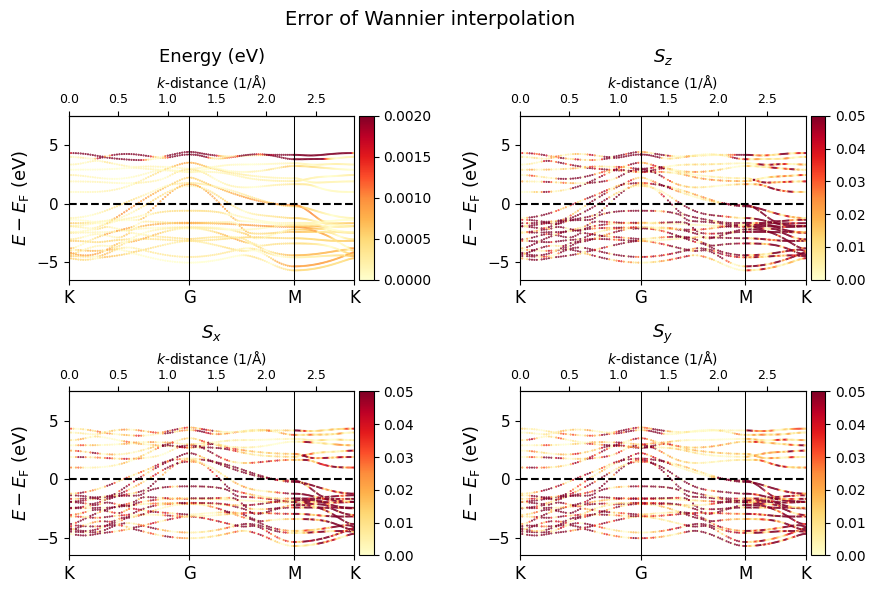

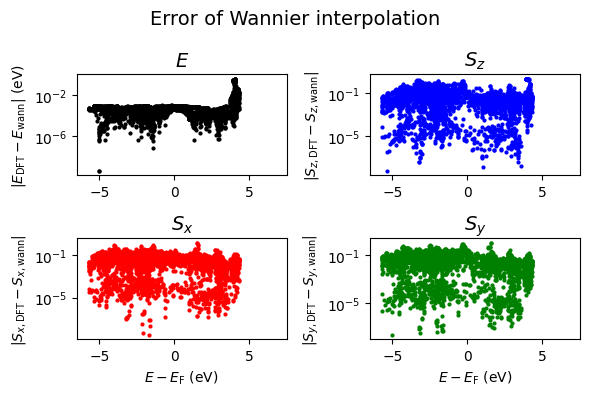

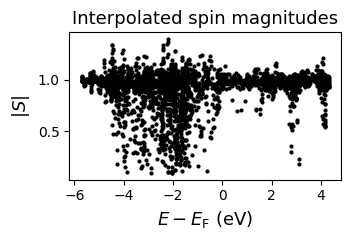

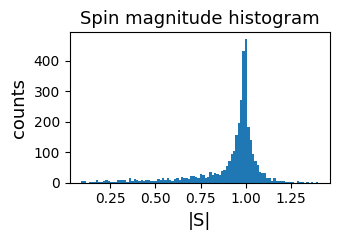

In [ ]:
yaxis_lim = [-6.5, 7.5]
savefig = True
showfig = True

model.wannier_quality(yaxis_lim=yaxis_lim, savefig=savefig, showfig=showfig)